In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_csv("train.csv",skiprows=range(1000,42000)) #reading the csv files using pandas
test_data = pd.read_csv("test.csv",skiprows=range(100,28000))

In [71]:
train_data.shape # print the dimension or shape of train data

(1000, 785)

In [72]:
test_data.shape # print the dimension or shape of test data

(100, 784)

In [73]:
train_data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [74]:
train_data.isnull().sum().head(15)

label      0
pixel0     0
pixel1     0
pixel2     0
pixel3     0
pixel4     0
pixel5     0
pixel6     0
pixel7     0
pixel8     0
pixel9     0
pixel10    0
pixel11    0
pixel12    0
pixel13    0
dtype: int64

In [75]:
test_data.isnull().sum().head(15)

pixel0     0
pixel1     0
pixel2     0
pixel3     0
pixel4     0
pixel5     0
pixel6     0
pixel7     0
pixel8     0
pixel9     0
pixel10    0
pixel11    0
pixel12    0
pixel13    0
pixel14    0
dtype: int64

In [76]:
test_data.describe()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
count   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
count   100.0  ...     100.0     100.0     100.0     100.0     100.0   
mean      0.0  ...       0.0       0.0       0.0       0.0       0.0   
std       0.0  ...       0.0       0.0       0.0       0.0       0.0   
min       0.0  ...       0.0       0.0       0.0       0.0       0.0   
25%       0.0  ...       0.0       0.0       0.0       0.0       0.0   
50%       0.0  ...       0.0       0.0       0.0       0.0       0.0   
75%       0.0  ...       0.0       0.0       0.0       0.0       0.0   
max       0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
count     100.0     100.0     100.0     100.0     100.0  
mean        0.0       0.0       0.0       0.0       0.0  
std         0.0       0.0       0.0       0.0       0.0  
min         0.0       0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0       0.0  
max         0.0       0.0       0.0       0.0       0.0  

[8 rows x 784 columns]

In [77]:
train_data.describe()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  1000.000000  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
mean      4.406000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.892323     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
count  1000.0  1000.0  ...    1000.0    1000.0    1000.0    1000.0    1000.0   
mean      0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
std       0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
min       0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
25%       0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
50%       0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
75%       0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   
max       0.0     0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
count    1000.0    1000.0    1000.0    1000.0    1000.0  
mean        0.0       0.0       0.0       0.0       0.0  
std         0.0       0.0       0.0       0.0       0.0  
min         0.0       0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0       0.0  
max         0.0       0.0       0.0       0.0       0.0  

[8 rows x 785 columns]

In [78]:
order = list(np.sort(train_data['label'].unique()))
print(order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


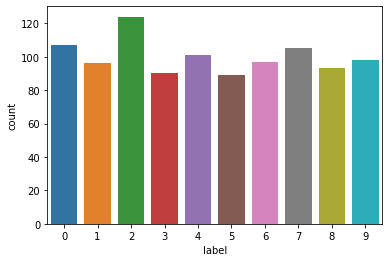

In [79]:
sns.countplot(train_data["label"])

2    124
0    107
7    105
4    101
9     98
6     97
1     96
8     93
3     90
5     89
Name: label, dtype: int64

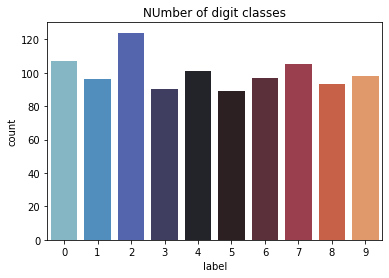

In [80]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

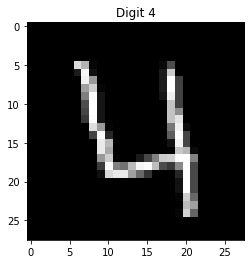

In [81]:
# Plotting some samples as well as converting into matrix

four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

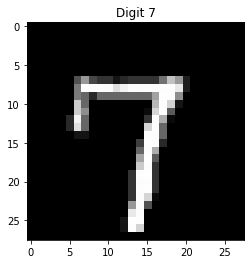

In [82]:
seven = train_data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

In [83]:
# average feature values
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [84]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(1000, 785)


In [85]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (1000, 784)
test_data: (100, 784)


In [86]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [33]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9133333333333333 

[[1160    0    0    1    6    6   12    1    1    1]
 [   0 1389    3    4    3    0    0    2   12    0]
 [   9   11 1146   38   11    4   10   12   17    2]
 [   5    4   35 1204    0   51    2    3   21    6]
 [   3    3   20    3 1132    1   10    4    2   40]
 [   9   17   10   67    7  997   14    2   19    7]
 [  15    2   15    0    9   15 1160    1    2    0]
 [   5   12   18    9   26    2    1 1212    3   42]
 [   8   31   24   45    8   61    9   14 1002   15]
 [   9    6    7   28   56    3    0   53    7 1106]]
